In [16]:
import pandas as pd
import numpy as np

file_name = './material/seoul-covid19_6_30_.csv'
df = pd.read_csv(file_name)
df.sort_values(by='연번', ascending=False)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


<AxesSubplot:title={'center':'한글 제목'}>

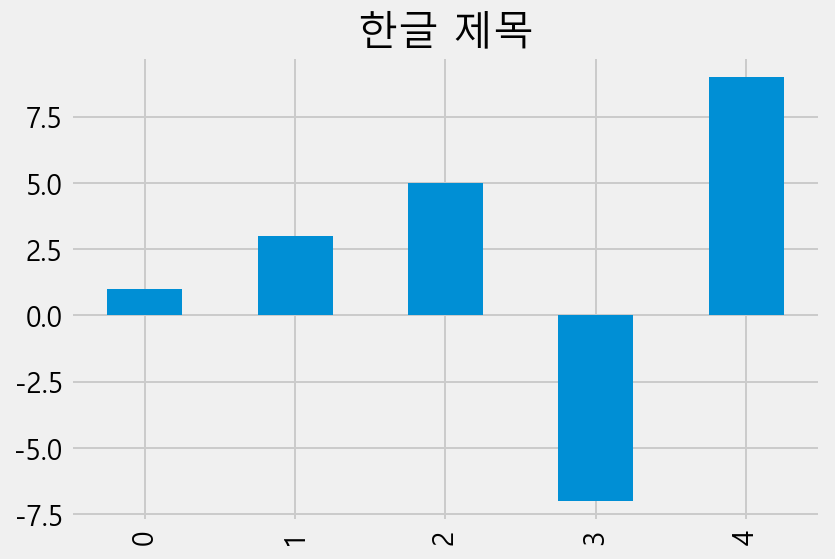

In [32]:
#한글폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# retina 디스플레이 지원환경에서 폰트 선명하게 하기
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina')

plt.style.use('fivethirtyeight')

pd.Series([1, 3, 5, -7, 9]).plot.bar(title='한글 제목')

In [24]:
# 확진일 6.30. --> 2020-06-30
df['확진일자'] = pd.to_datetime('2020-' + df['확진일'].str.replace('.','-'))
df[['확진일자', '확진일']].head()

<ipython-input-24-e8e108ba8cc7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['확진일자'] = pd.to_datetime('2020-' + df['확진일'].str.replace('.','-'))


,확진일자,확진일
0,2020-06-30,6.30.
1,2020-06-30,6.30.
2,2020-06-30,6.30.
3,2020-06-30,6.30.
4,2020-06-30,6.30.


In [27]:
# 월 추출
df['월'] = df['확진일자'].dt.month
df[['확진일자', '확진일', '월']].head()

,확진일자,확진일,월
0,2020-06-30,6.30.,6
1,2020-06-30,6.30.,6
2,2020-06-30,6.30.,6
3,2020-06-30,6.30.,6
4,2020-06-30,6.30.,6


In [29]:
# 해당 연도의 몇번째 주
df['주'] = df['확진일자'].dt.week
df[['확진일자', '확진일', '월', '주']].head()

<ipython-input-29-3ef32a01d454>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['주'] = df['확진일자'].dt.week


,확진일자,확진일,월,주
0,2020-06-30,6.30.,6,27
1,2020-06-30,6.30.,6,27
2,2020-06-30,6.30.,6,27
3,2020-06-30,6.30.,6,27
4,2020-06-30,6.30.,6,27


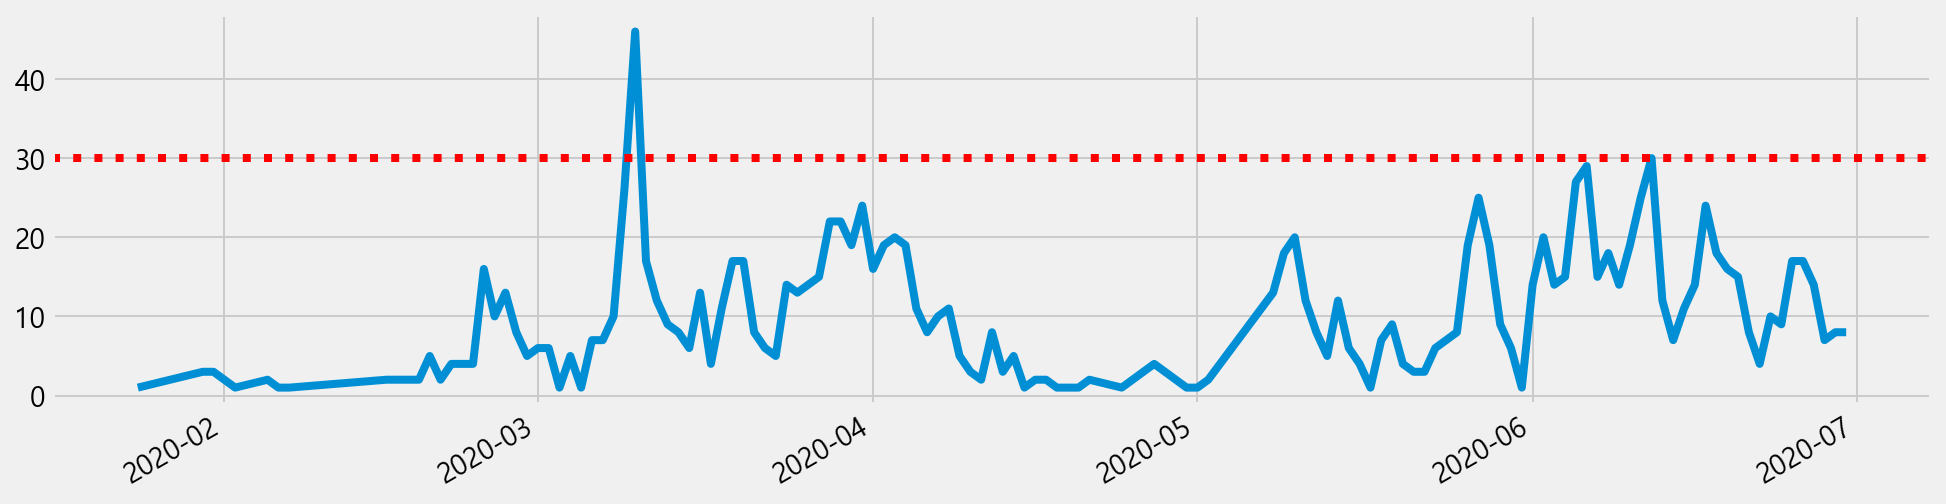

In [36]:
# 확진일자 선그래프
df['확진일자'].value_counts().sort_index().plot(figsize=(15, 4))
plt.axhline(30, color='red', linestyle=':')